# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [75]:
#citation: https://github.com/DataTell/python-api-challenge/blob/master/WeatherPy/WeatherPy.ipynb

# Dependencies and setup:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
%matplotlib inline

# Import API key:
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude:
from citipy import citipy

# Output file (CSV):
output_data_file='challenge6/output_data/cities.csv'

# Range of latitudes and longitudes:
lat_range=(-90, 90)
lng_range=(-180, 180)

#Turn off warninng messages
import warnings
warnings.filterwarnings("ignore")



### Generate the Cities List by Using the `citipy` Library

In [57]:
# List for holding lat_lngs and cities:
lat_lngs=[]
cities=[]

# Create a set of random lat and lng combinations:
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)

# Identify nearest city for each lat, lng combination:
for lat_lng in lat_lngs:
    city=citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list:
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient amount:
print(f"Number of cities in the list: {len(cities)}")






Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Starting URL for Weather Map API call
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
# Build partial query URL:
query_url=f"{url}appid={weather_api_key}&units={units}&q="




In [52]:
# Set up lists to hold response info:
name=[]         # list for city name
cloud=[]        # list for cloudines
ctry=[]         # list for country
date=[]         # list for date
humi=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxtemp=[]      # list for max temperature
wind=[]         # list for wind speed


count=1 

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...') 
                                                              
        count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 581 | alotau
alotau city not found. Skipping...
Processing Record 2 of 581 | ushuaia
Processing Record 3 of 581 | port alfred
Processing Record 4 of 581 | san juan de miraflores
Processing Record 5 of 581 | qaqortoq
Processing Record 6 of 581 | waitangi
Processing Record 7 of 581 | albany
Processing Record 8 of 581 | talnakh
Processing Record 9 of 581 | buka
Processing Record 10 of 581 | adamstown
Processing Record 11 of 581 | port-aux-francais
Processing Record 12 of 581 | grytviken
Processing Record 13 of 581 | mount pearl
Processing Record 14 of 581 | puerto ayora
Processing Record 15 of 581 | rio novo
Processing Record 16 of 581 | iqaluit
Processing Record 17 of 581 | bredasdorp
Processing Record 18 of 581 | coquimbo
Processing Record 19 of 581 | al ghayzah
Processing Record 20 of 581 | bonthe
Processing Record 21 of 581 | bilibino
Processing Record 22 of 581 | puerto natales
Processing Record 23 of 581 |

Processing Record 196 of 581 | mossendjo
Processing Record 197 of 581 | kassiri
Processing Record 198 of 581 | gonzalez
Processing Record 199 of 581 | hithadhoo
Processing Record 200 of 581 | hermanus
Processing Record 201 of 581 | turan
Processing Record 202 of 581 | warmbad
Processing Record 203 of 581 | ha'il
Processing Record 204 of 581 | haiku-pauwela
Processing Record 205 of 581 | katabu
Processing Record 206 of 581 | nuuk
Processing Record 207 of 581 | kaihua
Processing Record 208 of 581 | poletayevo
Processing Record 209 of 581 | tobi village
tobi village city not found. Skipping...
Processing Record 210 of 581 | saint-philippe
Processing Record 211 of 581 | rio grande
Processing Record 212 of 581 | salta
Processing Record 213 of 581 | kerikeri
Processing Record 214 of 581 | gallup
Processing Record 215 of 581 | taroa
Processing Record 216 of 581 | navojoa
Processing Record 217 of 581 | new norfolk
Processing Record 218 of 581 | ar ruseris
Processing Record 219 of 581 | iskatel

Processing Record 392 of 581 | ankang
Processing Record 393 of 581 | portage la prairie
Processing Record 394 of 581 | maceio
Processing Record 395 of 581 | achinsk
Processing Record 396 of 581 | ciudad lazaro cardenas
Processing Record 397 of 581 | san fernando de apure
Processing Record 398 of 581 | salinas
Processing Record 399 of 581 | columbia
Processing Record 400 of 581 | sonsorol village
sonsorol village city not found. Skipping...
Processing Record 401 of 581 | mejit
Processing Record 402 of 581 | chita
Processing Record 403 of 581 | huai khot
Processing Record 404 of 581 | marang
Processing Record 405 of 581 | kyabe
Processing Record 406 of 581 | xinyuan
Processing Record 407 of 581 | tejen
Processing Record 408 of 581 | plastun
Processing Record 409 of 581 | loreto
Processing Record 410 of 581 | holdrege
Processing Record 411 of 581 | pernio
Processing Record 412 of 581 | papao
Processing Record 413 of 581 | mangrol
Processing Record 414 of 581 | kousa
Processing Record 415 

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = {'City': name, 'Country': ctry, 'Date': date, 'Lat': lat, 'Lng': lng, 'Cloudiness (%)': cloud, 
                'Humidity (%)': humi, 'Max Temp (F)': maxtemp, 'Wind Speed (mph)': wind}

weather_data=pd.DataFrame(city_data_df)


# Show Record Count
weather_data.count()



City                561
Country             561
Date                561
Lat                 561
Lng                 561
Cloudiness (%)      561
Humidity (%)        561
Max Temp (F)        561
Wind Speed (mph)    561
dtype: int64

In [58]:
# Export the City_Data into a csv
weather_data.to_csv(output_data_file, index=False)

# Display the data frame:
weather_data.head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Ushuaia,AR,1683487511,-54.8000,-68.3000,75,66,51.46,5.75
1,Port Alfred,ZA,1683487512,-33.5906,26.8910,100,94,61.18,7.78
2,San Juan de Miraflores,PE,1683487513,-12.1629,-76.9635,84,76,75.72,8.63
3,Qaqortoq,GL,1683487513,60.7167,-46.0333,100,73,37.04,6.11
4,Waitangi,NZ,1683487392,-43.9535,-176.5597,100,95,57.81,3.00


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

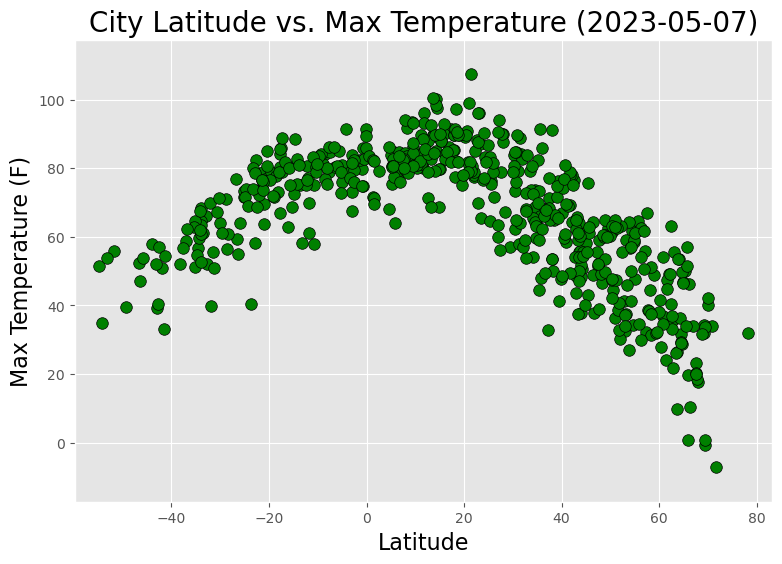

In [76]:
# Build a scatter plot for all cities vs max. temp.:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], marker='o', edgecolors='black', color='green', s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y and x axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig('output_data/Fig1.png')

# Show plot:
plt.show()

#### Latitude Vs. Humidity

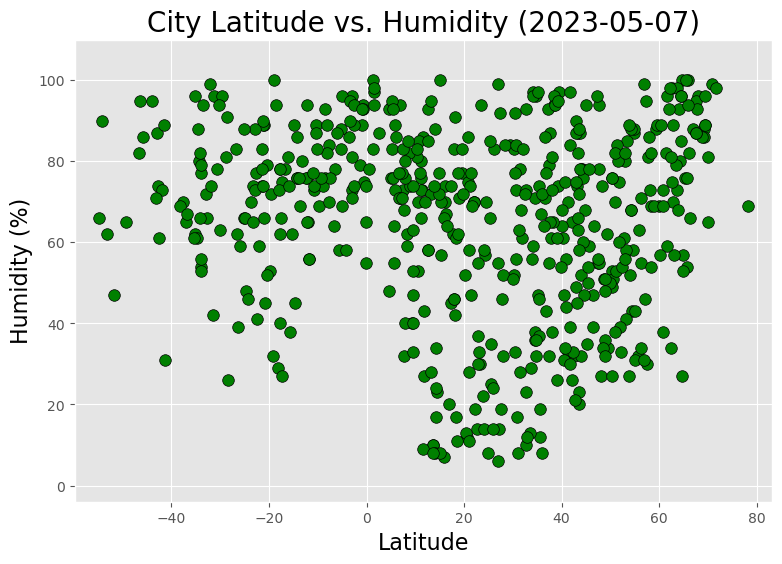

In [77]:
# Build a scatter plot for all cities vs humidity level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], marker='o', edgecolors='black', color='green', s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y and x axis:
plt.ylim(min(weather_data['Humidity (%)'])-10, max(weather_data['Humidity (%)'])+10)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig('output_data/Fig2.png')

# Show plot:
plt.show()



#### Latitude Vs. Cloudiness

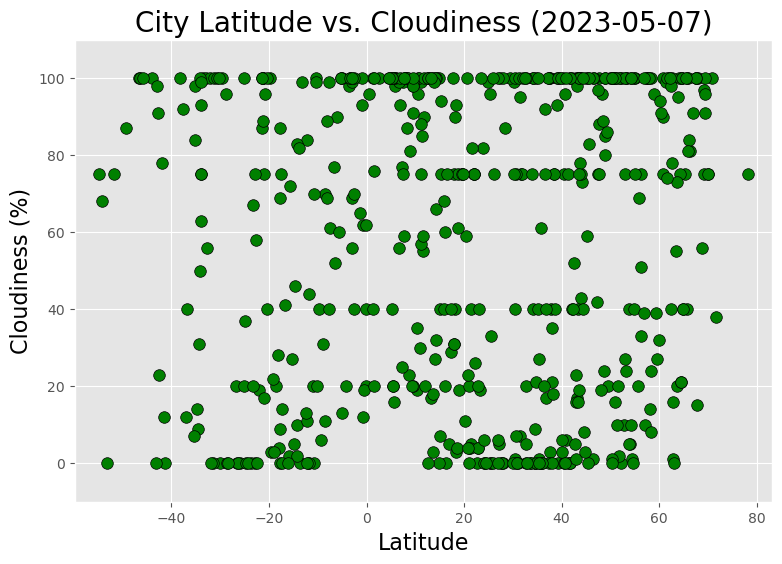

In [78]:
# Build a scatter plot for all cities vs cloudiness level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], marker='o', edgecolors='black', color='green', s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y and x axis:
plt.ylim(min(weather_data['Cloudiness (%)'])-10, max(weather_data['Cloudiness (%)'])+10)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('output_data/Fig3.png')

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

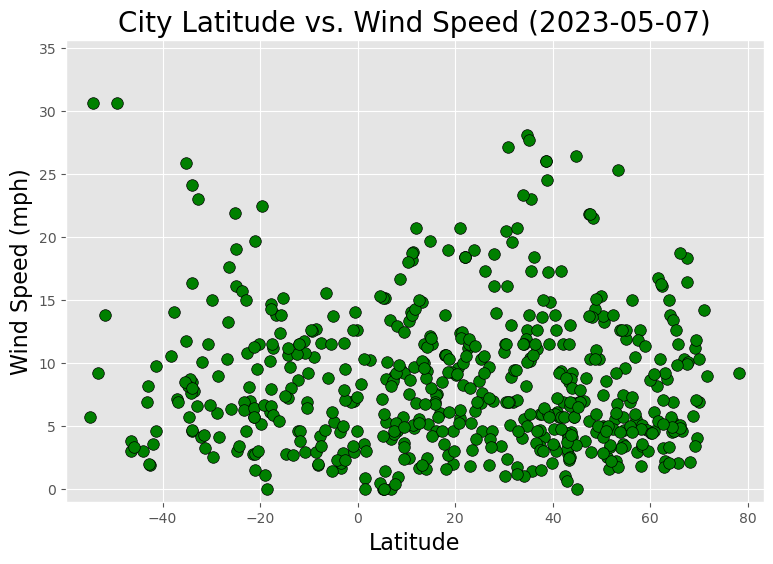

In [91]:
# Build a scatter plot for all cities vs wind speed:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], marker='o', edgecolors='black', color='green',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y and x axis:
plt.ylim(min(weather_data['Wind Speed (mph)'])-1, max(weather_data['Wind Speed (mph)'])+5)
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('output_data/Fig4.png')

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Regression values
    regress_values = x_values * slope + intercept
    
    #Line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_data[weather_data['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
3,Qaqortoq,GL,1683487513,60.7167,-46.0333,100,73,37.04,6.11
5,Albany,US,1683487513,42.6001,-73.9662,52,32,76.46,1.01
6,Talnakh,RU,1683487513,69.4865,88.3972,91,89,-0.65,4.09
7,Bo`ka,UZ,1683487514,40.8108,69.1986,6,56,58.62,6.13
11,Mount Pearl,CA,1683487514,47.5166,-52.7813,75,55,51.46,21.85


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_data[weather_data['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Ushuaia,AR,1683487511,-54.8000,-68.3000,75,66,51.46,5.75
1,Port Alfred,ZA,1683487512,-33.5906,26.8910,100,94,61.18,7.78
2,San Juan de Miraflores,PE,1683487513,-12.1629,-76.9635,84,76,75.72,8.63
4,Waitangi,NZ,1683487392,-43.9535,-176.5597,100,95,57.81,3.00
8,Adamstown,PN,1683487482,-25.0660,-130.1015,100,66,71.56,21.94


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.69


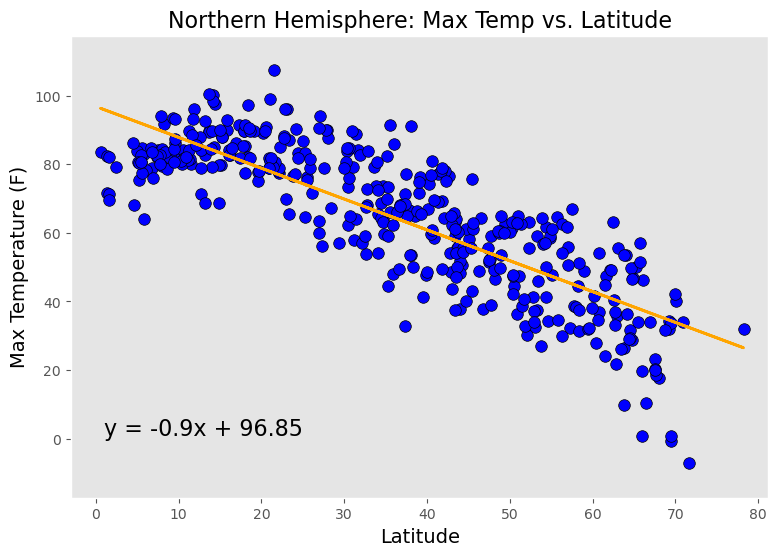

In [94]:
# Linear regression on Northern Hemisphere

plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp (F)']

# Linear regression for temp. vs Lat.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'orange', linewidth=2)

# Other graph properties
plt.title('Northern Hemisphere: Max Temp vs. Latitude', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=14, color='black')
plt.xlabel('Latitude', fontsize=14, color='black')
plt.annotate(line_eq,(1, 1), fontsize=16, color='black')
plt.grid(False)

# Limits of the y and x axis
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)
plt.xlim(-3, max(weather_data['Lat'])+3)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig5.png')

# Show plot
plt.show()



The r-squared is: 0.63


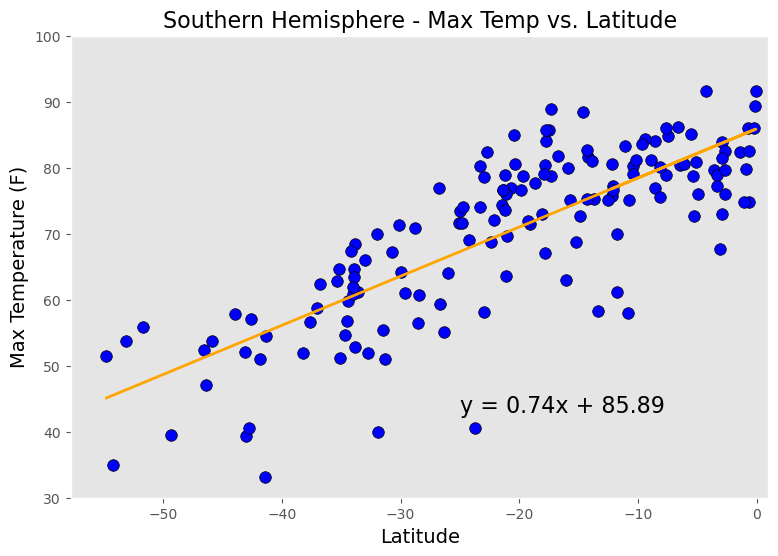

In [95]:
# Linear regression on Southern Hemisphere

plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp (F)']

# Linear regression for temp. vs. lat.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Line equation string
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'orange', linewidth=2)

# Other graph properties
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=14, color='black')
plt.xlabel('Latitude', fontsize=14, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=16, color='black')
plt.grid(False)

# Set the limits of the y and x axis
plt.ylim(30, 100)
plt.xlim(min(weather_data['Lat'])-3, +1)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig6.png')

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a postive correlation between max temperature and distance from the equator. The closer a city is to the equator (0 degrees lat.) the high the max temperature is in that city. Temperatures decrease as cities get farther away from the equater in both the Northern and Southern hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02


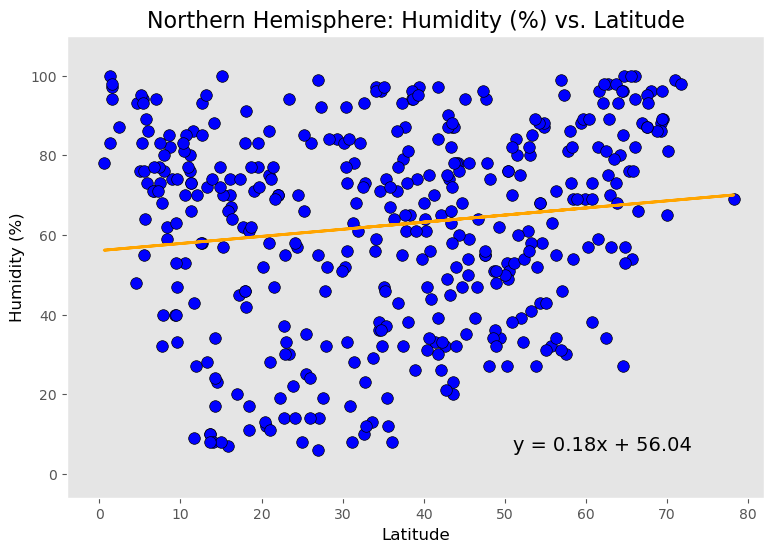

In [100]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity (%)']

# linear regression for humidity vs. lat.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'orange', linewidth=2)

# Other graph properties
plt.title('Northern Hemisphere: Humidity (%) vs. Latitude', fontsize=16)
plt.ylabel('Humidity (%)', fontsize=12, color='black')
plt.xlabel('Latitude', fontsize=12, color='black')
plt.annotate(line_eq,(51,6),fontsize=14, color='black')
plt.grid(False)

# Set the limits of the y and x axis
plt.ylim(-6, 110)
plt.xlim(-4, 82)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig7.png')

# Show plot
plt.show()

The r-squared is: 0.02


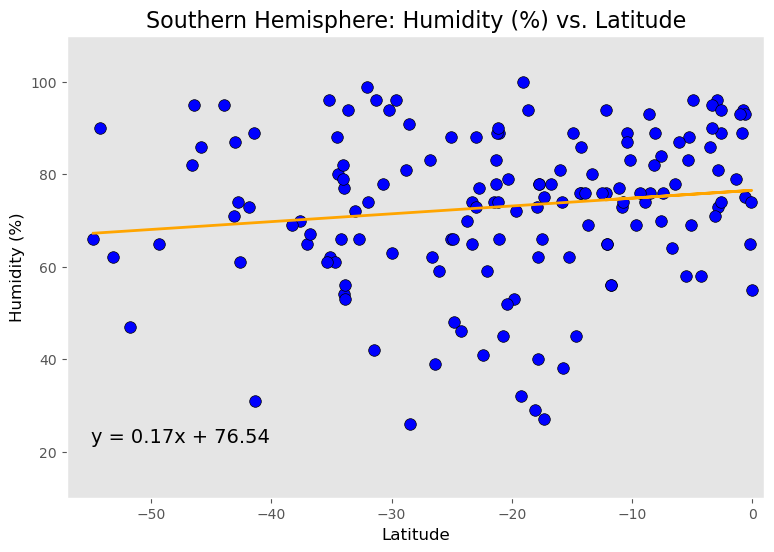

In [102]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity (%)']

# Linear regression for humidity vs. lat.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'orange', linewidth=2)

# Other graph properties
plt.title('Southern Hemisphere: Humidity (%) vs. Latitude', fontsize=16)
plt.ylabel('Humidity (%)', fontsize=12, color='black')
plt.xlabel('Latitude', fontsize=12, color='black')
plt.annotate(line_eq,(-55,22), fontsize=14, color='black')
plt.grid(False)

# Set the limits of the y and x axis
plt.ylim(10, 110)
plt.xlim(-57, 1)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig8.png')

# Show plot
plt.show()

**Discussion about the linear relationship: There is almost no correlation between humidity and cities located on either the southern or northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0


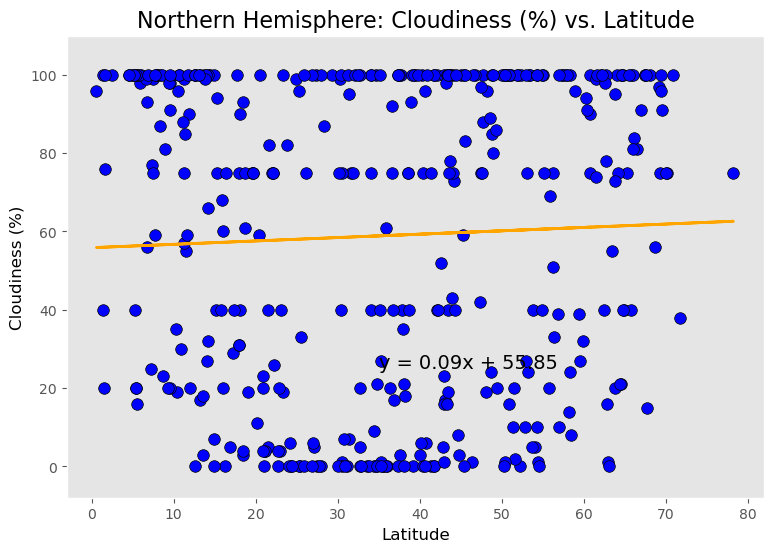

In [106]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness (%)']

# Linear regression for cloudiness vs. lat.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'orange', linewidth=2)

# Other graph properties
plt.title('Northern Hemisphere: Cloudiness (%) vs. Latitude', fontsize=16)
plt.ylabel('Cloudiness (%)', fontsize=12, color='black')
plt.xlabel('Latitude', fontsize=12, color='black')
plt.annotate(line_eq,(35,25), fontsize=14, color='black')
plt.grid(False)

# Set the limits of the y and x axis
plt.ylim(-8, 110)
plt.xlim(-3, 82)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig9.png')

# Show plot
plt.show()

The r-squared is: 0.0


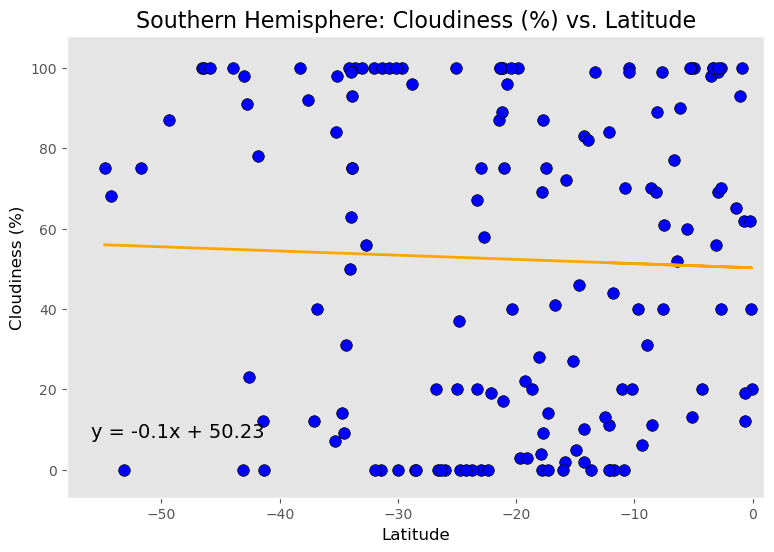

In [108]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness (%)']

# Linear regression for cloudiness vs. lat.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'orange', linewidth=2)

# Other graph properties
plt.title('Southern Hemisphere: Cloudiness (%) vs. Latitude', fontsize=16)
plt.ylabel('Cloudiness (%)', fontsize=12, color='black')
plt.xlabel('Latitude', fontsize=12, color='black')
plt.annotate(line_eq,(-56,8), fontsize=14, color='black')
plt.grid(False)

# Set the limits of the y and x axis
plt.ylim(-7, 108)
plt.xlim(-58, 1)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig10.png')

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no correlation between cloudiness and latitudinal position

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


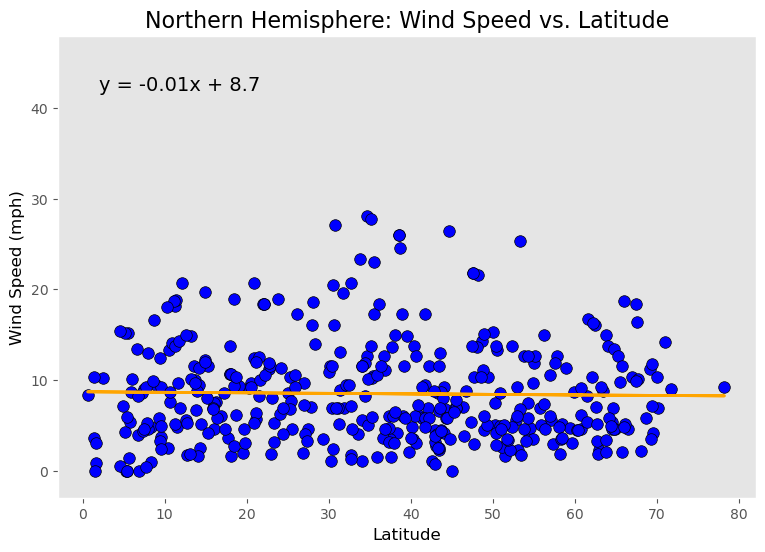

In [109]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed (mph)']

# Linear regression for wind speed vs. lat.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'orange', linewidth=2)

# Other graph properties
plt.title('Northern Hemisphere: Wind Speed vs. Latitude', fontsize=16)
plt.ylabel('Wind Speed (mph)', fontsize=12, color='black')
plt.xlabel('Latitude', fontsize=12, color='black')
plt.annotate(line_eq,(2,42), fontsize=14, color='black')
plt.grid(False)

# Set the limits of the y and x axis
plt.ylim(-3, 48)
plt.xlim(-3, 82)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig11.png')

# Show plot
plt.show()

The r-squared is: 0.03


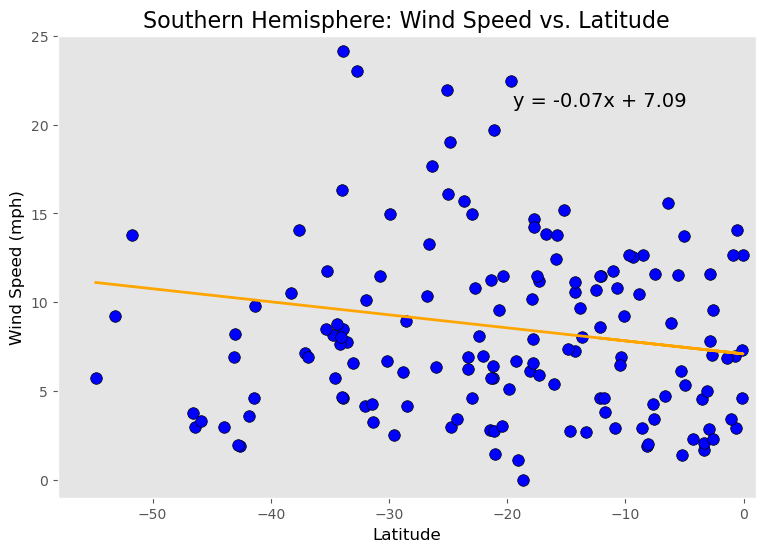

In [111]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed (mph)']

# Linear regression on wind speed vs. latit.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'orange', linewidth=2)

# Other graph properties
plt.title('Southern Hemisphere: Wind Speed vs. Latitude', fontsize=16)
plt.ylabel('Wind Speed (mph)', fontsize=12, color='black')
plt.xlabel('Latitude', fontsize=12, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=14, color='black')
plt.grid(False)

# Set the limits of the y and x axis:
plt.ylim(-1, 25)
plt.xlim(-58, 1)

print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure
plt.savefig('output_data/Fig12.png')

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude in cities in the Northern Hemishpere, and almsot no correlationn in the Southern Hemisphere. 